In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [0]:
data=pd.read_csv('/content/Automobile.csv')

In [4]:
data.head()

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling              201 non-null int64
normalized_losses      201 non-null int64
make                   201 non-null object
fuel_type              201 non-null object
aspiration             201 non-null object
number_of_doors        201 non-null object
body_style             201 non-null object
drive_wheels           201 non-null object
engine_location        201 non-null object
wheel_base             201 non-null float64
length                 201 non-null float64
width                  201 non-null float64
height                 201 non-null float64
curb_weight            201 non-null int64
engine_type            201 non-null object
number_of_cylinders    201 non-null object
engine_size            201 non-null int64
fuel_system            201 non-null object
bore                   201 non-null float64
stroke                 201 non-null float64
compression_ratio      201 non-nu

In [7]:
data.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,125.189055,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5121.393035,25.179104,30.686567,13207.129353
std,1.254802,33.572966,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,479.624905,6.423220,6.815150,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
print(data.shape)

(201, 26)


In [12]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [0]:
X=data[['city_mpg', 'highway_mpg', 'horsepower','peak_rpm','engine_size','price']]

In [27]:
X.head()

,city_mpg,highway_mpg,horsepower,peak_rpm,engine_size,price
0,21,27,111,5000,130,13495
1,21,27,111,5000,130,16500
2,19,26,154,5000,152,16500
3,24,30,102,5500,109,13950
4,18,22,115,5500,136,17450


In [0]:
Y=data[['price']]

In [29]:
Y.head()

,price
0,13495
1,16500
2,16500
3,13950
4,17450


In [30]:
x=X.drop('price',axis=1)  # feature matrix
y=Y['price']              # target variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

140
61
140
61


In [31]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#higher the alpha value,more restriction on the coefficients
#low alpha>more generalization ,coff are barely
rr=Ridge(alpha=0.01)
#restrict in this case linear and ridge regression resembles
rr.fit(x_train,y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
rr100=Ridge(alpha=100)#comparision with aplha value
rr100.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [34]:
train_score=lr.score(x_train,y_train)
test_score=lr.score(x_test,y_test)
print(train_score)
print(test_score)

0.7994702743974054
0.7805789994969696


In [0]:
train_score_rr100=rr100.score(x_train,y_train)
test_score_rr100=rr100.score(x_test,y_test)


In [36]:
print(train_score_rr100)
print(test_score_rr100)

0.7993429816792663
0.7811683441689848


In [37]:
rr10000=Ridge(alpha=10000)#comparision with aplha value
rr10000.fit(x_train,y_train)

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
train_score_rr10000=(rr10000.score(x_train,y_train)*100)
test_score_rr10000=(rr10000.score(x_test,y_test)*100)
print(train_score_rr10000)
print(test_score_rr10000)

79.48322967880488
78.46769475507152


## LASSO REGRESSION

In [0]:
lasso=Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used=np.sum(lasso.coef_!=0)

In [40]:
print('training score',train_score)
print('test score',test_score)

training score 0.7994702380568028
test score 0.7805902435879561


In [41]:
print("number of features used :"),coeff_used

number of features used :


(None, 5)

In [42]:
lasso001=Lasso(alpha=0.01,max_iter=10000) #stopping criteria
lasso001.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
train_score_001=(lasso001.score(x_train,y_train)*100)
test_score_001=(lasso001.score(x_test,y_test)*100)

In [63]:
print('training score',train_score_001)
print('testscore',test_score_001)

training score 79.94702743937701
testscore 78.05791122614114


## ELEASTIC NET

In [0]:
from sklearn.linear_model import ElasticNetCV,ElasticNet
from sklearn.metrics import r2_score
cv_model=ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,.995,1],
                     eps=0.001,n_alphas=100,fit_intercept=True,
                     normalize=True,precompute='auto',max_iter=2000,
                     tol=0.0001,cv=5,
                     copy_X=True)

In [48]:
cv_model.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=100, n_jobs=None, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [49]:
print('optimal alpha:',cv_model.alpha_)
print('optimal l1_ratio',cv_model.l1_ratio_)
print('no of iterations',cv_model.n_iter_)

optimal alpha: 2.7391069402154757
optimal l1_ratio 1.0
no of iterations 34


In [50]:
model=ElasticNet(l1_ratio=cv_model.l1_ratio_,alpha=cv_model.alpha_,max_iter=cv_model.n_iter_,fit_intercept=True,normalize=True)
model.fit(x_train,y_train)

ElasticNet(alpha=2.7391069402154757, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=34, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [54]:
print(r2_score(y_train,model.predict(x_train))*100)
print(r2_score(y_test,model.predict(x_test))*100)


79.92168137762731
78.21362334665405


#Feature variables

In [0]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


In [75]:
df = pd.read_csv('Automobile.csv')
df.head()


,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,number_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,168,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,168,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [0]:
cols = ["symboling",'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'engine_size', 'bore', 'stroke', 'horsepower',
        'peak_rpm', 'city_mpg', 'highway_mpg',"normalized_losses"]


In [0]:
X = df[cols] #Feature Matrix
y = df["price"]          #Target Variable

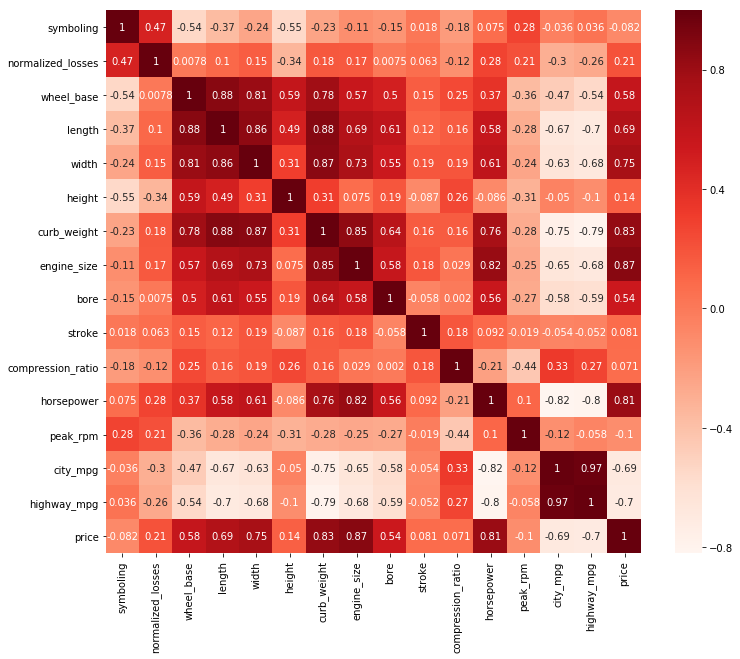

In [78]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [79]:
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

wheel_base     0.584642
length         0.690628
width          0.751265
curb_weight    0.834415
engine_size    0.872335
bore           0.543052
horsepower     0.810795
city_mpg       0.686571
highway_mpg    0.704692
price          1.000000
Name: price, dtype: float64

In [80]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [81]:
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const                6.557824e-05
symboling            1.876519e-01
wheel_base           2.215227e-01
length               8.949917e-02
width                1.436397e-02
height               1.577270e-01
curb_weight          1.228897e-02
engine_size          1.553453e-10
bore                 4.750193e-01
stroke               2.479460e-03
horsepower           2.823429e-02
peak_rpm             7.887506e-03
city_mpg             3.360992e-01
highway_mpg          1.416895e-01
normalized_losses    8.900465e-01
dtype: float64

In [84]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
model = LinearRegression()

['width', 'curb_weight', 'engine_size', 'stroke', 'peak_rpm']


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
#Initializing RFE model
rfe = RFE(model, 3)

In [0]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

In [88]:
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
X.columns

[False False False  True False False False  True  True False False False
 False False]
[ 4  7  9  1  3 10  6  1  1  8 11  2  5 12]


Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'engine_size', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'normalized_losses'],
      dtype='object')

In [0]:
#no of features
nof_list=np.arange(1,13)            
high_score=0

In [90]:
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.737811


In [0]:
cols = list(X.columns)
model = LinearRegression()

In [0]:
#Initializing RFE model
rfe = RFE(model, 3) 

In [0]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  

In [94]:
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['width', 'bore', 'stroke'], dtype='object')
